## Simple Linear Regression

### AIM
- Here my aim is to train my model to predict Height based on Weight as a input
- As here i have only one independent input variabloe so it is Simple Linear Regression
- Also it can be classified under Supervised Regression Model as i have dataset here based on which i am going to tain my model

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [104]:
df.corr('spearman')

,Weight,Height
Weight,1.000000,0.923861
Height,0.923861,1.000000


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [106]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [107]:
df.duplicated().sum()

0

In [108]:
df.count()

Weight    22
Height    22
dtype: int64

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.count()

Weight    22
Height    22
dtype: int64

Text(0.5, 0, 'Height')

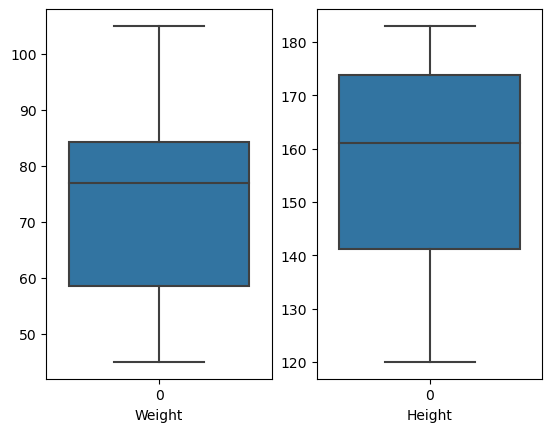

In [111]:
plt.subplot(1,2 ,1)
sns.boxplot(df['Weight'])
plt.xlabel('Weight')
plt.subplot(1,2 ,2)
sns.boxplot(df['Height'])
plt.xlabel('Height')

Text(0.5, 0, 'Height')

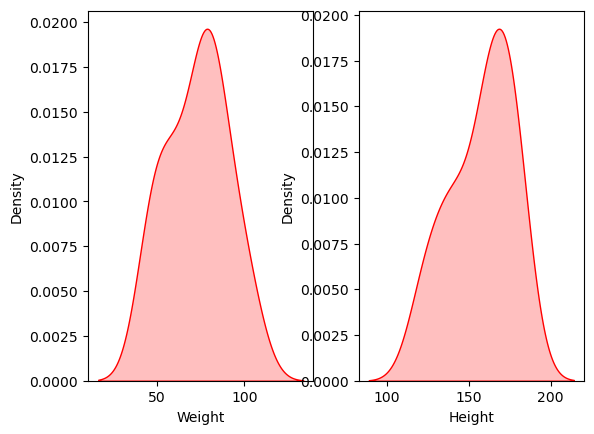

In [112]:
plt.subplot(1,2 ,1)
sns.kdeplot(x=df['Weight'],shade=True, color='r')
plt.xlabel('Weight')
plt.subplot(1,2 ,2)
sns.kdeplot(x=df['Height'],shade=True, color='r')
plt.xlabel('Height')

In [113]:
print('Weight::  ',df['Weight'].mean(),df['Weight'].mode()[0],df['Weight'].median())
print('Height::  ',df['Height'].mean(),df['Height'].mode()[0],df['Height'].median())

Weight::   72.86363636363636 78 77.0
Height::   157.3181818181818 140 161.0


<AxesSubplot: xlabel='Weight', ylabel='Height'>

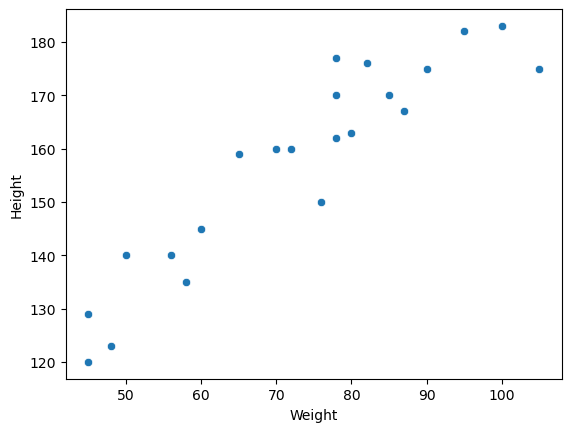

In [114]:
sns.scatterplot(x=df['Weight'],y=df['Height'])

<AxesSubplot: xlabel='Weight', ylabel='Height'>

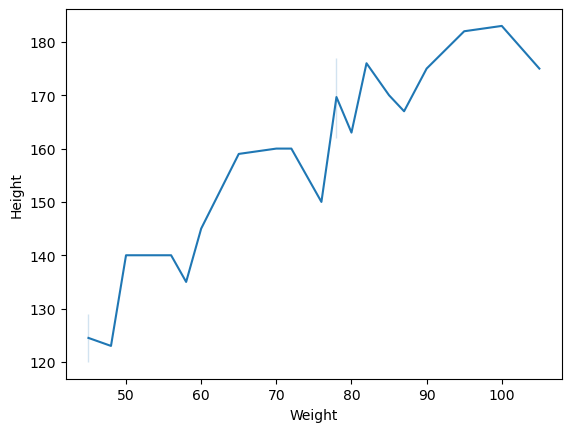

In [115]:
sns.lineplot(x=df['Weight'],y=df['Height'])

### INSIGHTS
- No null value in dataset
- Removed 1 duplicate element
- We can see my weight highly positively related with my weight by corr plot
- Neither my Weight nor my Height has Ouliers which may alter or give bias prediction
- We can see they almost follow normal distribution thier mean mode median does not vary much
- Throught their scatter and line plot we can see Height is linearly increasing with weight

### SUMMARY
- So we have done data cleaning and understood how input and output are basically varying by various feature and data visualization


### ML PART
- Now coming to ML here we know for creating ML model we have to train our dataset then validate and then test it

- Divide features based on dependent and independent feature in dataset
   - I have input as independent Feature => Weight
   - I have output as dependent Feature => Height

- Training our data 

In [116]:
from sklearn.model_selection import train_test_split

- Here I have four variables
    - X_train as a independent input feature used for training my model
    - y_train as a dependent output feature used for training my model
    - X_test as a independent input feature used for testing my model
    - y_test as a dependent output feature used for testing my model

In [117]:
X=df[['Weight']]
y=df[['Height']]

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42) 
#Here test size is 0.20 means out of 100 data 80 will be used for traininn my model
# And 0.80 will be used for testing my model

In [119]:
X_train.head()

,Weight
5,78
21,56
12,105
3,60
4,70


In [120]:
X_test.head()

,Weight
0,45
14,85
8,95
1,58
16,50


In [121]:
X_train.shape

(17, 1)

In [122]:
X_test.shape

(5, 1)

In [123]:
#That is 17 data values will be used for actually training my model
#While 5 data values will be used for testing my model

#### Standarizing the Data 
- As we can see here my input and output variables are having different units that is my height is in cm and weight is in kg
- Also different scale that is my height is ranging from 120 cm to 180 cm
- While my weight is ranging from 50 kg to 100 kg
- Also due to standarizing my calculation will be fast as i will have my all data variables values ranging between -3 to +3

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler=StandardScaler()

- Note: Here while doing standarization Fit transform should only be done for train data
- While for test data only transform need to be done because my model should not have any information regarding my test data

In [126]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.20608301],
       [-1.17025708],
       [ 1.89522766],
       [-0.92001342],
       [-0.2944043 ],
       [ 0.08096118],
       [ 1.58242309],
       [ 0.76913122],
       [-0.60720886],
       [-1.67074438],
       [ 0.20608301],
       [-0.16928247],
       [ 0.95681396],
       [ 0.45632666],
       [ 0.20608301],
       [-1.85842712],
       [ 0.33120483]])

In [127]:
X_test=scaler.transform(X_test)
X_test

array([[-1.85842712],
       [ 0.6440094 ],
       [ 1.26961853],
       [-1.04513525],
       [-1.54562255]])

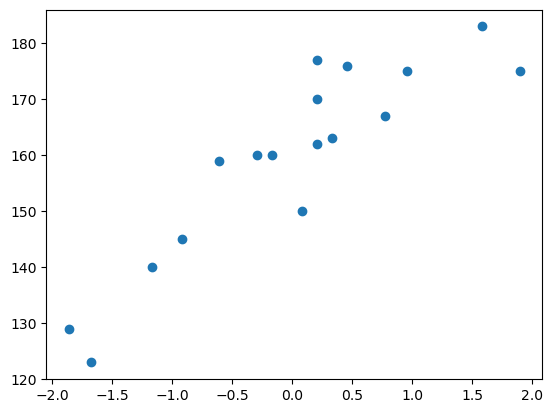

In [128]:
plt.scatter(x=X_train,y=y_train)

In [129]:
### Now training my Simple Regression Model using Linear Regresion
from sklearn.linear_model import LinearRegression

In [130]:
regressor=LinearRegression()

In [131]:
regressor.fit(X_train,y_train) #Gives slope and intercept for best fit line
#By trying all posible values

LinearRegression()

In [132]:
slope=regressor.coef_
intercept=regressor.intercept_

In [133]:
slope[0][0]

15.015484989908533

In [134]:
intercept[0]

159.64705882352942

In [135]:
m=slope[0][0]
c=intercept[0]

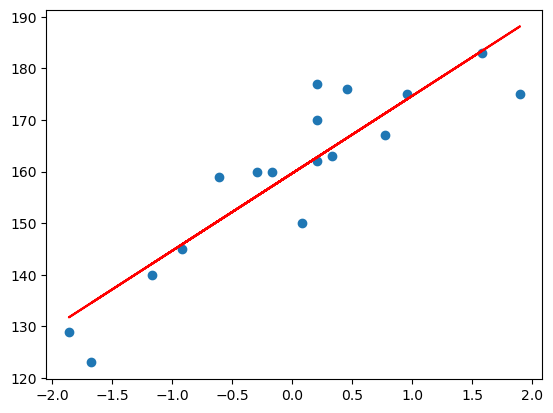

In [136]:
plt.scatter(x=X_train,y=y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =159.64 + 15.01(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =159.64 + 15.01(X_test)

### Comparing my actual test data output and predicted test data output

In [137]:
y_pred_test=regressor.predict(X_test)

In [138]:
y_pred_test 

array([[131.74187432],
       [169.31717226],
       [178.71099675],
       [143.95384615],
       [136.43878657]])

In [139]:
y_test

,Height
0,120
14,170
8,182
1,135
16,140


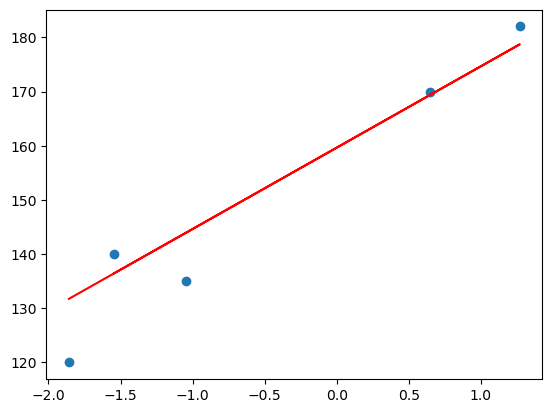

In [140]:
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [141]:
#Above scattered piont represent my actual test data output and line is my predicted test data output 

#### Finding my minimum error that occured in creating best fit line 
- Through Various cost function
  - MSE MAE RMSE

In [142]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [143]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

In [144]:
mse,mae,rmse

(48.401802156635156, 5.645752979414948, 6.957140372066324)

#### Performance Matrix (How well is my ml model predicting for new data ie Finding Accuracyof my ml model)

In [145]:
from sklearn.metrics import r2_score

#### i)R squared accuracy
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [146]:
#Calculating adjusted r2 accuracy
r2_accuracy=r2_score(y_test,y_pred_test)
r2_accuracy*100

90.85792494774948

#### ii)Adjusted r squared accuracy
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [147]:
#Calculating adjusted r2 accuracy
adjusted_r2_accuracy=1 - (1-r2_accuracy)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2_accuracy*100

87.81056659699931

#### Predicting output for new data point 
- Here we will give our own weight as a input to get output

In [148]:
regressor

LinearRegression()

In [149]:
scaler.transform([[80]])

array([[0.33120483]])

In [150]:
regressor.predict(scaler.transform([[80]]))

array([[164.62026002]])

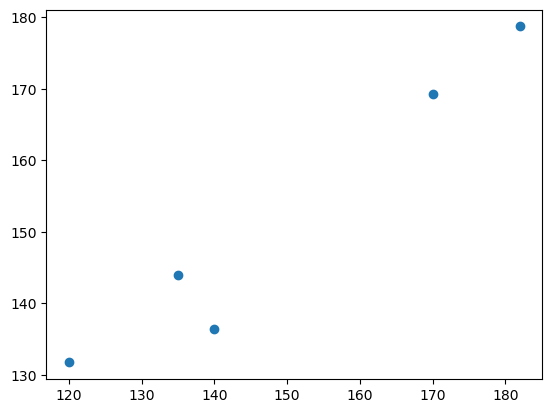

In [151]:
plt.scatter(y_test,y_pred_test)

In [152]:
#As here x axis and y axis value are almost simialr for data point
#Hence i can say my ml model is very well predicting

#### Residuals

In [153]:
residuals=y_test-y_pred_test

In [154]:
residuals

,Height
0,-11.741874
14,0.682828
8,3.289003
1,-8.953846
16,3.561213


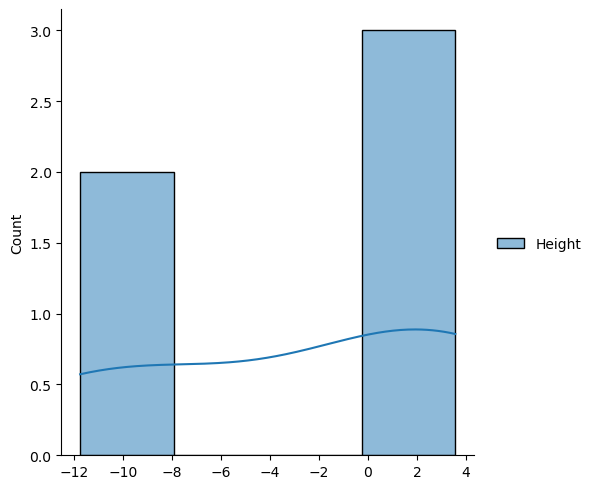

In [155]:
sns.displot(residuals,kde=True)

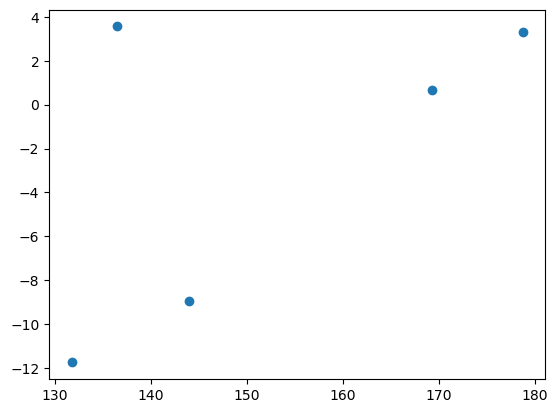

In [156]:
plt.scatter(y_pred_test,residuals)

## Pickling 
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [157]:
import pickle

In [158]:
pickle.dump(regressor,open('linearregressor.pkl','wb'))

In [159]:
model=pickle.load(open('linearregressor.pkl','rb'))

In [160]:
#Single input for all features price prediction
data=[[40]]
data=scaler.fit_transform(data)
# m,n=data.shape
# data=data.reshape(n,m)
model.predict(data)

array([[159.64705882]])

In [161]:
#Multiple input for all features price prediction
data=[[70,45]]
data=scaler.fit_transform(data)
m,n=data.shape
data=data.reshape(n,m)
model.predict(data)

array([[159.64705882],
       [159.64705882]])

In [162]:
X_test.shape


(5, 1)

In [163]:
data.shape

(2, 1)